# Objective- To predict whether the a given chest X-ray image is Pneumonia infected or not

* The dataset is obtained from kaggle competition ebsite given below.
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

* Due to large dataset the modelling is performed on google colab.
* Convolutional Neural network is used to extract features from the image pixels of RGB x-ray image.


# import libraries

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import csv
import os



# Link colab platform with google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


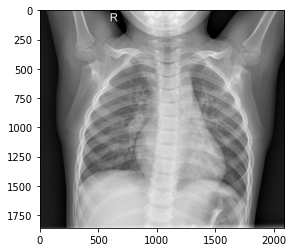

In [ ]:
from PIL import Image
image = Image.open(r'/content/drive/My Drive/train/IM-0115-0001.jpeg')
#plt.imshow(image)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

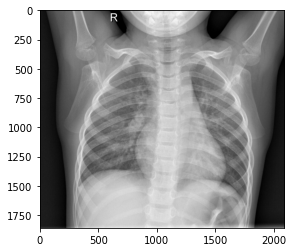

In [ ]:
img= cv2.imread(r'/content/drive/My Drive/train/IM-0115-0001.jpeg')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:

img.shape


(1858, 2090, 3)

In [ ]:

train=pd.read_csv(r'/content/drive/My Drive/train/train.csv',names=["Image", "label"])
test=pd.read_csv(r'/content/drive/My Drive/test/test.csv',names=["Image", "label"])

val=pd.read_csv(r'/content/drive/My Drive/val/val.csv',names=["Image", "label"])

In [ ]:
print(train.shape)
print(test.shape)
print(val.shape)

(5216, 2)
(624, 2)
(16, 2)


In [ ]:
train['label'].value_counts()

1    3875
0    1341
Name: label, dtype: int64

In [ ]:
3875/(3875+1341)

0.7429064417177914

In [ ]:
new = list(zip(train['Image'], train['label']))
vali= list(zip(test['Image'], test['label']))

# Generator function to fetch data in batches

In [ ]:
def shuffle(samples):
    
    return random.shuffle(samples)
 
def generator(path,samples, batch_size=64):
   
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        shuffle(samples)
 
        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size &lt;= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]
 
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
 
            # For each example
            for batch_sample in batch_samples:
                # Load image (X)
                filename = path + '//' + batch_sample[0]
                image = cv2.imread(filename)
                image=cv2.resize(img,(200,200))
                image=image[20:180,20:180]
                # Read label (y)
                y = batch_sample[1]
                # Add example to arrays
                X_train.append(image)
                y_train.append(y)
 
            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)
 
            # The generator-y part: yield the next training batch            
            yield X_train, y_train
 


In [ ]:
train_path= r'/content/drive/My Drive/train'
test_path= r'/content/drive/My Drive/test'

In [ ]:
# Import list of train and validation data (image filenames and image labels)
# Note this is not valid code.
train_samples = new
validation_samples = vali
 
# Create generator
train_generator = generator(train_path,train_samples, batch_size=32)
validation_generator = generator(train_path,validation_samples, batch_size=32)

In [ ]:
import keras
from keras import layers
from keras import models

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, InputLayer, Activation, ZeroPadding2D, BatchNormalization,MaxPool2D
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Modelling

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


In [ ]:
# compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=5216 // 64,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=624 // 64)

Epoch 1/10
81/81 [==============================] - 43s 527ms/step - loss: 2.9153 - accuracy: 0.7172 - val_loss: 0.6925 - val_accuracy: 0.6215
Epoch 2/10
81/81 [==============================] - 44s 542ms/step - loss: 0.5906 - accuracy: 0.7369 - val_loss: 0.6854 - val_accuracy: 0.6354
Epoch 3/10
81/81 [==============================] - 44s 549ms/step - loss: 0.5885 - accuracy: 0.7396 - val_loss: 0.6949 - val_accuracy: 0.5903
Epoch 4/10
81/81 [==============================] - 43s 534ms/step - loss: 0.5697 - accuracy: 0.7488 - val_loss: 0.6571 - val_accuracy: 0.6562
Epoch 5/10
81/81 [==============================] - 45s 555ms/step - loss: 0.5951 - accuracy: 0.7350 - val_loss: 0.6825 - val_accuracy: 0.6319
Epoch 6/10
81/81 [==============================] - 43s 532ms/step - loss: 0.5706 - accuracy: 0.7515 - val_loss: 0.7162 - val_accuracy: 0.6146
Epoch 7/10
81/81 [==============================] - 43s 533ms/step - loss: 0.5833 - accuracy: 0.7404 - val_loss: 0.6603 - val_accuracy: 0.6632

In [ ]:
5216 // 32

163

In [ ]:
624 // 32

19

In [ ]:
5216 // 64

81